In [1]:
import gudhi
import numpy as np 
import matplotlib.pyplot as plt

First we generate our point cloud. Here I'll randomly sample a circle and then scoop out the middle to form an annulus

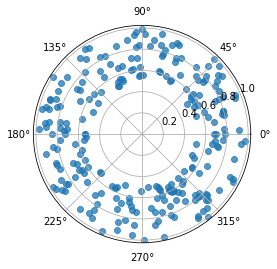

In [2]:
numsamp = 500
radii = np.random.rand(numsamp)
radii = radii[radii>.5]
numsamp = len(radii)
angles = np.random.rand(len(radii))*2*np.pi
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(angles,radii, alpha=0.75)

Now we need a distance matrix for our point cloud. I'll choose the Euclidean distance as our metric here.

In [3]:
distmat = np.zeros((len(radii),len(radii)))
for i in range(numsamp):
    for j in range(i,numsamp):
        r1 = radii[i]
        r2 = radii[j]
        theta = angles[i]
        phi = angles[j]
        d = r1**2 + r2**2 -2*r1*r2*np.cos(theta-phi)
        distmat[i,j] = np.sqrt(d)
distmat = distmat + distmat.T

Now with our distance matrix we're ready to apply persistent homology.

2731389


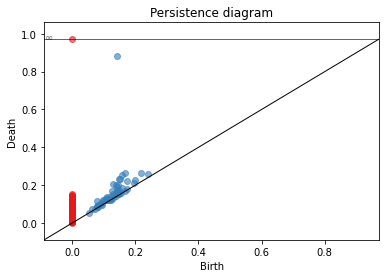

In [4]:
rc = gudhi.RipsComplex(distance_matrix=distmat)
st = rc.create_simplex_tree(max_dimension = 2)
print(st.num_simplices())
diag = st.persistence()
gudhi.plot_persistence_diagram(diag)
plt.show()

Notice the blue dot far above the diagonal; that's the hole in the center of the annulus